# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [38]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [39]:
tips = sns.load_dataset("tips")

In [40]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.drop((tips['tip_pct'].idxmax()), inplace=True) #dropando um valor outlier

<Axes: xlabel='net_bill', ylabel='tip_pct'>

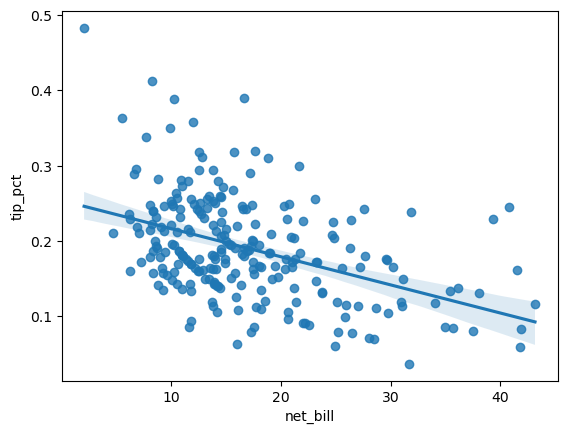

In [41]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

In [42]:
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     54.36
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.67e-12
Time:                        20:27:29   Log-Likelihood:                 306.24
No. Observations:                 243   AIC:                            -608.5
Df Residuals:                     241   BIC:                            -601.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2617      0.010     25.335      0.000       0.241       0.282
net_bill      -0.0041      0.001     -7.373      0.000      -0.005      -0.003
==============================================================================
Omnibus:                      122.373   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.982
Skew:                           1.836   Prob(JB):                    9.36e-204
Kurtosis:                      11.880   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

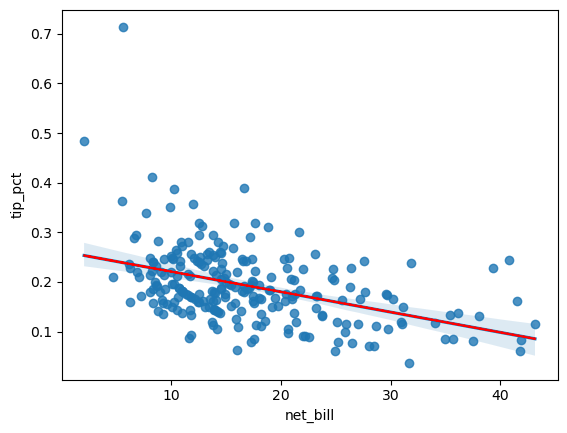

In [43]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_pct.fittedvalues, 'r--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [44]:
reg_pct_log = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
reg_pct_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     71.81
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.38e-15
Time:                        20:27:29   Log-Likelihood:                 313.21
No. Observations:                 243   AIC:                            -622.4
Df Residuals:                     241   BIC:                            -615.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4074      0.026     15.864      0.000       0.357       0.458
np.log(net_bill)    -0.0789      0.009     -8.474      0.000      -0.097      -0.061
==============================================================================
Omnibus:                      103.591   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.443
Skew:                           1.582   Prob(JB):                    1.02e-133
Kurtosis:                      10.105   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

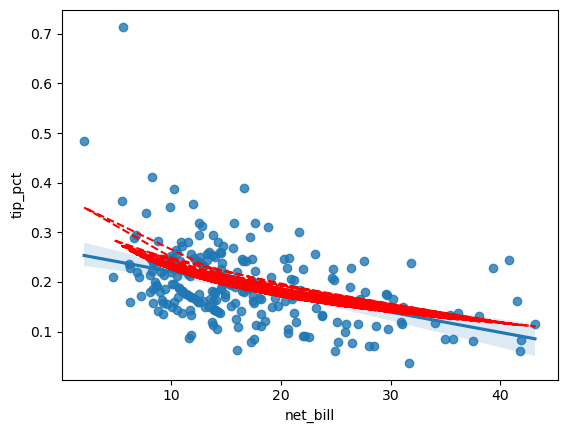

In [45]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_pct_log.fittedvalues, 'r--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [46]:
reg_pct_2nd = smf.ols('tip_pct ~ np.power(net_bill, 2)', data = tips).fit()
reg_pct_2nd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     39.85
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.31e-09
Time:                        20:27:30   Log-Likelihood:                 300.12
No. Observations:                 243   AIC:                            -596.2
Df Residuals:                     241   BIC:                            -589.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2210      0.006     34.763      0.000       0.208       0.234
np.power(net_bill, 2) -8.097e-05   1.28e-05     -6.312      0.000      -0.000   -5.57e-05
==============================================================================
Omnibus:                      130.825   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1125.333
Skew:                           1.953   Prob(JB):                    4.33e-245
Kurtosis:                      12.792   Cond. No.                         695.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

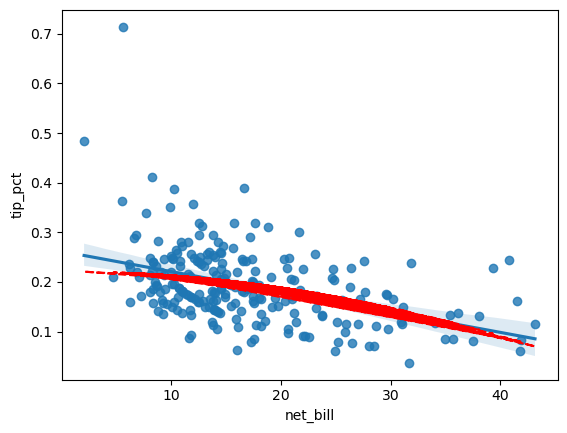

In [47]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_pct_2nd.fittedvalues, 'r--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [48]:
reg_pct_logtip = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
reg_pct_logtip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     72.35
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.93e-15
Time:                        20:27:30   Log-Likelihood:                -86.585
No. Observations:                 243   AIC:                             177.2
Df Residuals:                     241   BIC:                             184.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3198      0.052    -25.373      0.000      -1.422      -1.217
net_bill      -0.0237      0.003     -8.506      0.000      -0.029      -0.018
==============================================================================
Omnibus:                        6.203   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.300
Skew:                          -0.220   Prob(JB):                       0.0260
Kurtosis:                       3.726   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

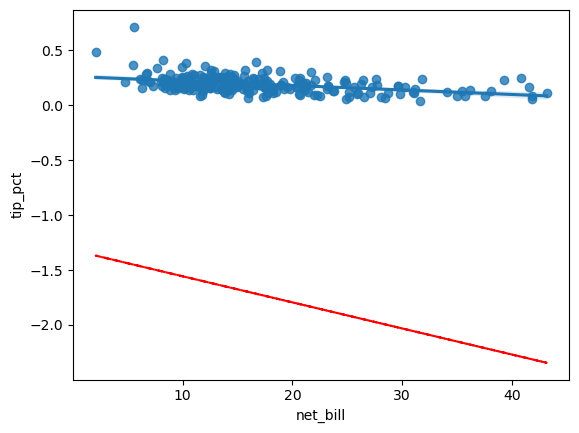

In [49]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_pct_logtip.fittedvalues, 'r--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [50]:
reg_pct_loglog = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
reg_pct_loglog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.69
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.45e-16
Time:                        20:27:30   Log-Likelihood:                -84.531
No. Observations:                 243   AIC:                             173.1
Df Residuals:                     241   BIC:                             180.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5728      0.132     -4.340      0.000      -0.833      -0.313
np.log(net_bill)    -0.4217      0.048     -8.814      0.000      -0.516      -0.327
==============================================================================
Omnibus:                        6.336   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.356
Skew:                          -0.304   Prob(JB):                       0.0417
Kurtosis:                       3.508   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

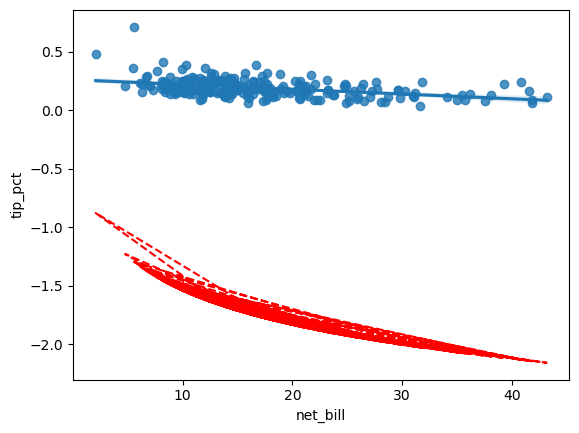

In [51]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg_pct_loglog.fittedvalues, 'r--')

###  6. qual modelo resultou no melhor ajuste?

Ao meu ver, o log do tip_pct em função de net_bill foi o modelo que apresentou a maior semelhança com a linha de tendência traçada entre as duas variáveis. Os outros modelos podem se mostrar promissores ao transformarmos seus resultados de volta ao modelo exponencial.